In [24]:
# encoding=utf-8
import re
import jieba_fast as jieba
import wordcloud
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas import DataFrame,Series
# from xpinyin import Pinyin 
# from Pinyin2Hanzi import DefaultDagParams
# from Pinyin2Hanzi import dag

# 解决乱码问题
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"]=False

In [2]:
data = pd.read_csv("data/job.csv",encoding='gbk')
data = data.fillna(0)
# 前几条数据
data.head()

,_id,url,title,money,company,experience,requirement,detail,goods
0,5f0112d93342821665175723,https://jobs.51job.com/shanghai-hkq/116974871....,k12班主任 学管师 欢迎优秀应届生,1-1.5万/月,清羽教育,招若干人,07-04发布,【岗位职责】1.了解学生的学习进展情况并向家长沟通反馈，对所带在读学员提供高水平的服务，促使...,带薪年假、五险一金、绩效奖金、节日福利、专业培训、加班补贴、补充医疗保险、员工旅游、定期体检...
1,5f0112d93342821665175724,https://jobs.51job.com/guangzhou-pyq/116429800...,高级需求分析师,0.8-1.2万/月,广东中象集运科技有限公司,3-4年经验,本科,岗位职责：1、协助产品经理关于平台建设及产品的调研、分析、规划设计2、负责产品功能设计，绘制...,五险一金、专业培训、绩效奖金、年终奖金、员工旅游
2,5f0112d93342821665175725,https://jobs.51job.com/shanghai-pdxq/116409796...,H5前端,1-1.8万/月,上海狂龙数字科技股份有限公司,3-4年经验,本科,工作职责:1、负责前端5核心代码的开发，解决前端的各种问题，前端工程搭建、框架整合、界面优化...,五险一金、绩效奖金、做五休二、带薪年假、周末双休、节日福利
3,5f0112d93342821665175726,https://jobs.51job.com/shenzhen-ftq/116959378....,外贸业务员,6-8千/月,深圳市勃维科技有限公司,大专,招2人,任职要求：1. 大专以上学历22 -35岁，具有与客户通过和电话流畅交流的能力2. 熟悉外贸...,绩效奖金、带薪年假、年底双薪、五险一金、餐饮补贴
4,5f0112d93342821665175727,https://jobs.51job.com/shanghai-pdxq/116423119...,网易产品销售（5k+不加班）,0.5-1万/月,上海四易信息科技有限公司,招3人,07-04发布,1、对上海企业部负责人或法人进行网易企业邮箱:..产品的推广销售2、寻找***，利用电话、网...,做五休二、交通补贴、带薪年假、五险一金、节日福利、全勤奖、绩效奖金


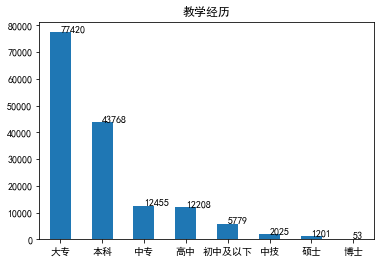

In [80]:
# 教学经历
data_requirement = data['requirement'].value_counts()
filter_requirement = ['大专','本科','中专','高中','初中及以下','中技','硕士','博士']
for (key,value) in data_requirement.items():
    if key not in filter_requirement:
        del data_requirement[key]
data_requirement.plot(kind='bar',rot=0)
plt.title('教学经历')
# 显示数值
i = 0
for (key,value) in data_requirement.items():
    plt.text(i,value,value)
    i += 1
plt.show()

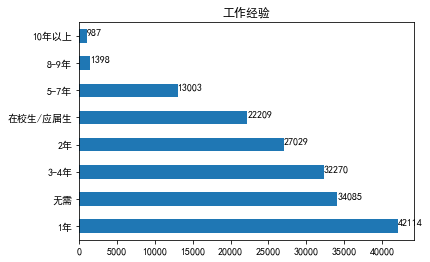

In [86]:
# 工作经验
data_experience = data['experience'].value_counts()
filter_experience = ['1年经验','无需经验','3-4年经验','2年经验','在校生/应届生','5-7年经验','8-9年经验','10年以上经验']
for (key,value) in data_experience.items():
    if key not in filter_experience:
        del data_experience[key]
        continue
    data_experience[re.sub('经验','',key)] = data_experience.pop(key) # 去掉"经验"
data_experience.plot(kind='barh',rot=0)
plt.title('工作经验')
# 显示数值
i = 0
for (key,value) in data_experience.items():
    plt.text(value,i,value)
    i += 1
plt.show()

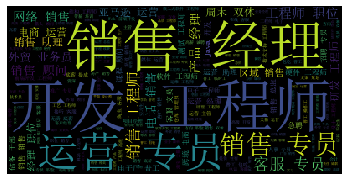

In [162]:
# 职位
final = ''
stopwords = ['编号','代表','五险','一金']
for n in range(len(data['title'])):
    seg_list = list(jieba.cut(data['title'][n]))
    for seg in seg_list:
        if seg not in stopwords:
            final += seg + ' '
my_wordcloud = wordcloud.WordCloud(font_path = r'C:\Windows\Fonts\simsun.ttc').generate(final)
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()

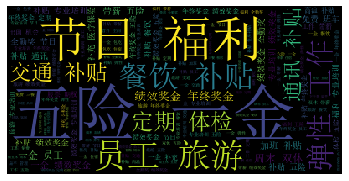

In [164]:
# 福利
final = ''
stopwords = []
for n in range(len(data['goods'])):
    seg_list = list(jieba.cut(str(data['goods'][n])))
    for seg in seg_list:
        if seg not in stopwords:
            final += seg + ' '
my_wordcloud = wordcloud.WordCloud(font_path = r'C:\Windows\Fonts\simsun.ttc').generate(final)
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()

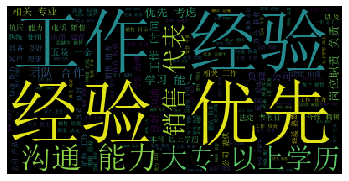

In [5]:
# 详细工作
final = ''
stopwords = ['职能','类别','要求','微信','分享','任职']
for n in range(len(data['detail']):
    seg_list = list(jieba.cut(str(data['detail'][n])))
    for seg in seg_list:
        if seg not in stopwords:
            final += seg + ' '
my_wordcloud = wordcloud.WordCloud(font_path = r'C:\Windows\Fonts\simsun.ttc').generate(final)
plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()

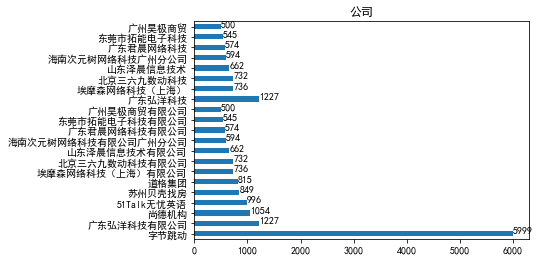

In [12]:
data_company = data['company'].value_counts()
# data_company['其他'] = 0 
for (key,value) in data_company.items():
    if value < 500:
#         data_company['其他'] += value
        del data_company[key]
        continue
    data_company[re.sub(r'有限公司','',key)] = data_company[key]
data_company.plot(kind='barh',rot=0)
plt.title('公司')
# 显示数值
i = 0
for (key,value) in data_company.items():
    plt.text(value,i,value)
    i += 1
plt.show()

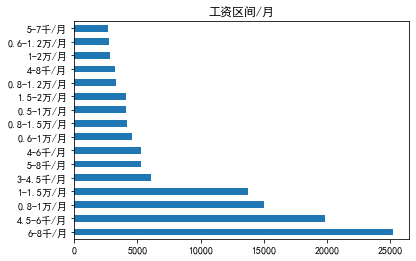

In [75]:
# for (key,value) in enumerate(data['money']):
#         num = re.search(r'([\d|\.]+)',str(value))
#         uunit = re.search(r'([万|千])',str(value))
#         if num:
#             num = num.group()
#         if uunit:
#             uunit = uunit.group()
#         data['money'][str(key)] = str(num) + str(uunit)
data_money = data['money'].str.extract('([\d|\.].*?)')
# data_money = {}
data_money = data['money'].value_counts()
for (key,value) in data_money.items():
    if value < 2000:
        del data_money[key]
        continue
#     data_money[re.sub(r'/月','',str(key))] = data_money[str(key)]
data_money.plot(kind='barh',rot=0)
plt.title('工资区间/月')
plt.show()

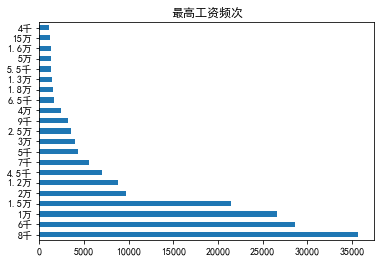

In [21]:
data_money = data['money'].str.extract('-([\d|\.|万|千]+)')
# data_money = {}
# for value in data['money'].items():
#     if key < 
data_money = data_money[0].value_counts()
for (key,value) in data_money.items():
    if value < 1000:
        del data_money[key]
        continue
data_money.plot(kind='barh',rot=0)
plt.title('最高工资频次')
plt.show()

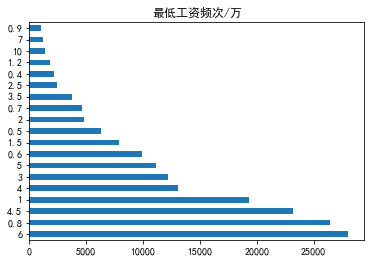

In [77]:
data_money = data['money'].str.extract('([\d|\.]+)')
# data_money = {}
# for value in data['money'].items():
#     if key < 
data_money = data_money[0].value_counts()
for (key,value) in data_money.items():
    if value < 1000:
        del data_money[key]
        continue
data_money.plot(kind='barh',rot=0)
plt.title('最低工资频次/万')
plt.show()

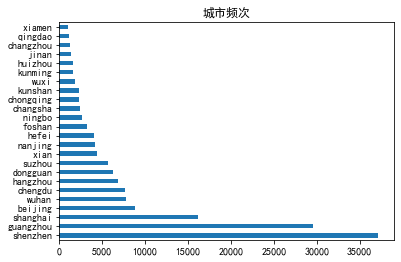

In [41]:
# https://jobs.51job.com/shanghai-hkq/116974871....
data_address = data['url'].str.extract(r'https://[a-z|.].*?/([a-z].*?)[\-|/].*?')
# data_money = {}
# for value in data['money'].items():
#     if key < 
data_address = data_address[0].value_counts()
for (key,value) in data_address.items():
    if value < 1000:
        del data_address[key]
        continue
#     # 拼音转汉字
#     translator=DefaultDagParams()
#     result = dag(translator, key ,path_num=5,log=True)
#     data_address[result] = data_address.pop(key)
data_address.plot(kind='barh',rot=0)
plt.title('城市频次')
plt.show()